In [1]:
# TensorFlow and tf.keras
import tensorflow as tf 

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


In [2]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
fashion_mnist=tf.keras.datasets.fashion_mnist

In [4]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [5]:
type(train_images)

numpy.ndarray

In [6]:
print(train_images)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
train_images.shape

(60000, 28, 28)

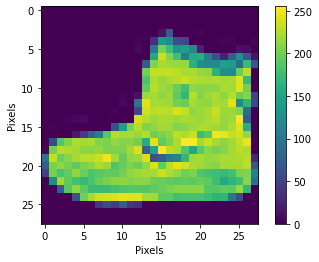

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.grid(False)

In [10]:
#Scaling the data
train_images=train_images/255
test_images=test_images/255

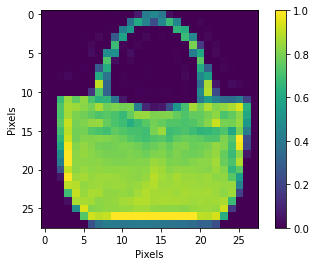

In [11]:
plt.figure()
plt.imshow(train_images[100])
plt.colorbar()
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.grid(False)

plt.figure(figsize=(12,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i])
    plt.xticks([])
    plt.xlabel(class_names[train_labels[i]])
    plt.tight_layout()

In [12]:
from tensorflow.keras.layers import Dense,Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import Sequential

In [13]:
train_images=train_images.reshape(60000,28,28,1)
train_images.shape

(60000, 28, 28, 1)

In [14]:
model=None
model=Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [15]:
model.compile(optimizer='adam',loss
                 =tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [16]:
model.fit(train_images,train_labels,epochs=30)

Epoch 1/30


/Users/h.r.rao/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/backend.py:4929: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


1875/1875 [==============================] - 73s 39ms/step - loss: 0.4567 - accuracy: 0.8332
Epoch 2/30
1875/1875 [==============================] - 73s 39ms/step - loss: 0.3024 - accuracy: 0.8882
Epoch 3/30
1875/1875 [==============================] - 85s 45ms/step - loss: 0.2578 - accuracy: 0.9044
Epoch 4/30
1875/1875 [==============================] - 72s 38ms/step - loss: 0.2251 - accuracy: 0.9151
Epoch 5/30
1875/1875 [==============================] - 70s 38ms/step - loss: 0.1992 - accuracy: 0.9246
Epoch 6/30
1875/1875 [==============================] - 76s 41ms/step - loss: 0.1791 - accuracy: 0.9322
Epoch 7/30
1875/1875 [==============================] - 73s 39ms/step - loss: 0.1603 - accuracy: 0.9395
Epoch 8/30
1875/1875 [==============================] - 78s 41ms/step - loss: 0.1400 - accuracy: 0.9459
Epoch 9/30
1875/1875 [==============================] - 76s 41ms/step - loss: 0.1291 - accuracy: 0.9507
Epoch 10/30
1875/1875 [==============================] - 76s 40ms/step - lo

In [17]:
test_images=test_images.reshape(10000,28,28,1)
test_images.shape

(10000, 28, 28, 1)

In [18]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 3s - loss: 0.6124 - accuracy: 0.9129

Test accuracy: 0.9128999710083008


<h1 style="color:#444; text-align: center; font-family: Arial">Accuracy of 91.29%!</h1>
<h3 style="color:#333; text-align: center; font-family: Arial; margin: 5px; padding: 6px;">Convolutional Neural Network</h3>

In [19]:
probability_model=Sequential([model,tf.keras.layers.Softmax()])

In [20]:
predictions=probability_model.predict(test_images)

In [21]:
predictions.shape

(10000, 10)

In [22]:
predictions[0]

array([0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.08533674,
       0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.23196931],
      dtype=float32)

In [23]:
np.argmax(predictions[0])

9

In [25]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [24]:
def plot_image(i,predictions_array,true_label,img):
    true_label,img=true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.imshow(img)
    predictions_label=np.argmax(predictions_array)
    if predictions_label==true_label:
        color='blue'
    else:
        color='red'
    plt.xlabel(" {} {:2.0f}% ({})".format(class_names[predictions_label],
                                          100*np.max(predictions_array),
               class_names[true_label]),color=color)

In [26]:
def plot_value_array(i,predictions_array,true_label):
    true_label=true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    thisplot=plt.bar(range(10),predictions_array,color="#777777")
    plt.ylim([0,1])
    predicted_label=np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

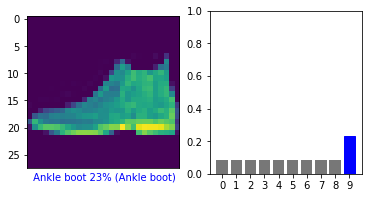

In [27]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)

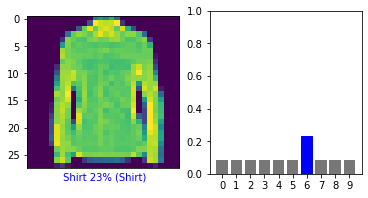

In [28]:
i = 26
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)

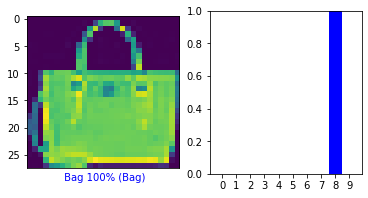

In [45]:
i = 69
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)

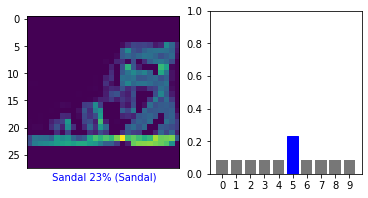

In [29]:
i = 9876
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)

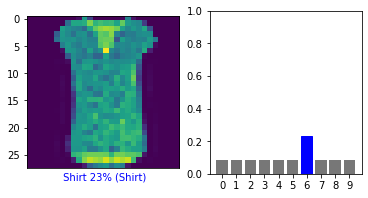

In [30]:
i = 7777
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)

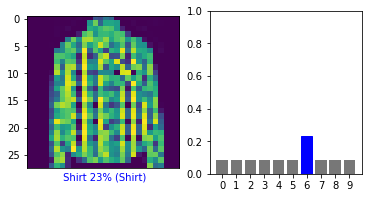

In [31]:
i = 725
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)

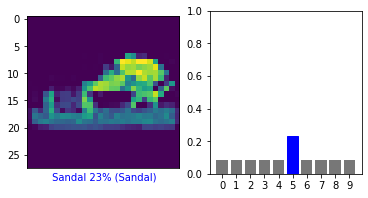

In [32]:
i = 3690
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)

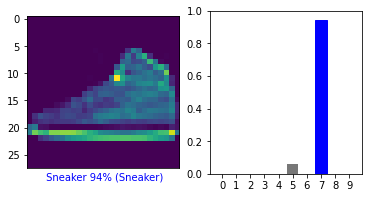

In [50]:
i = 45
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)

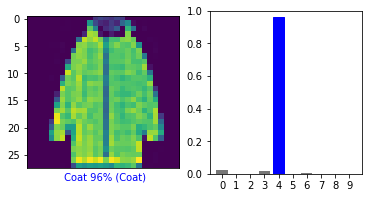

In [51]:
i = 888

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)

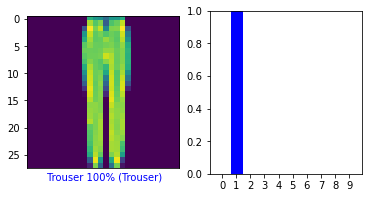

In [52]:
i = 9998
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)

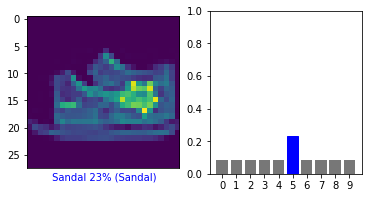

In [33]:
i = 9999
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)

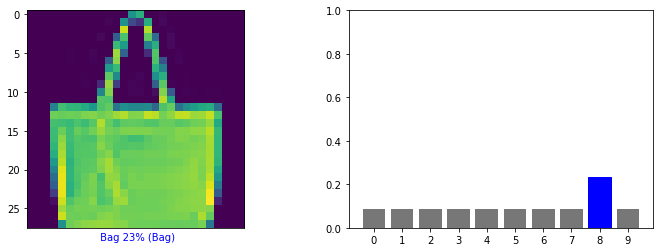

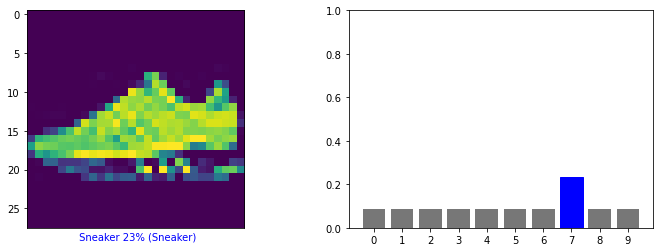

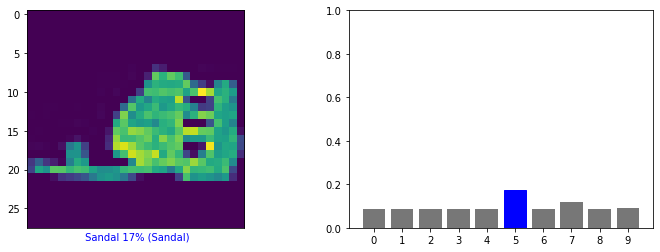

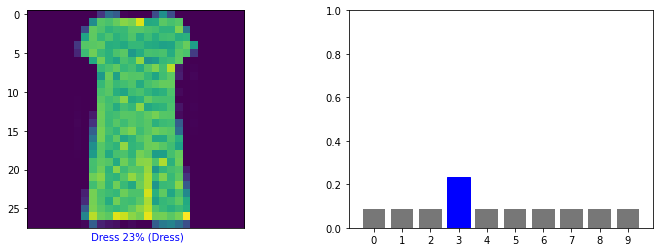

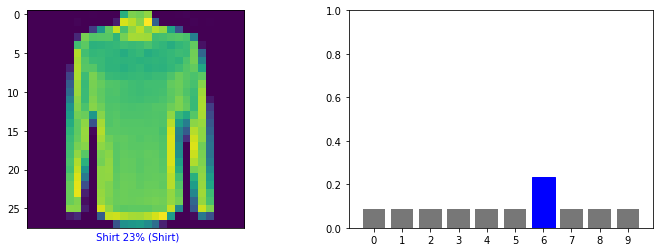

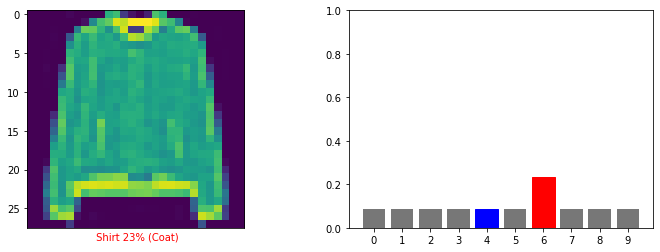

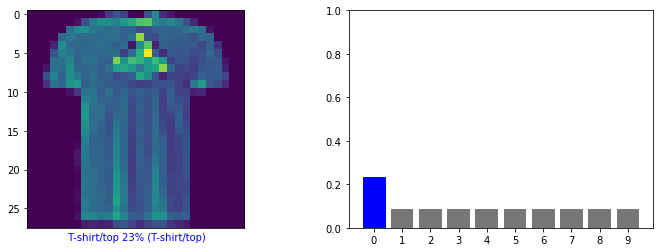

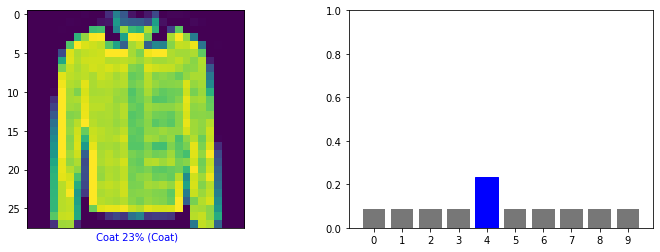

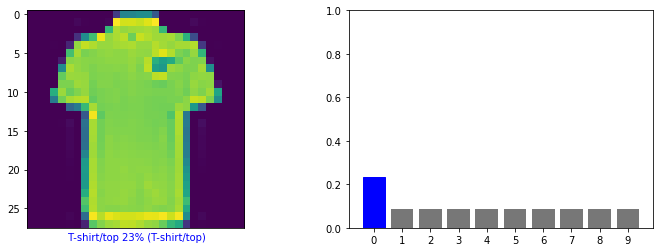

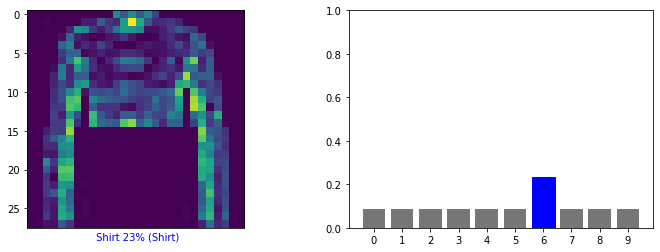

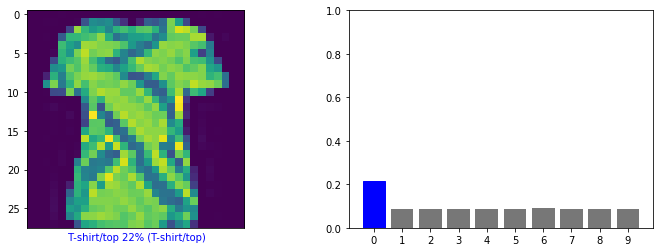

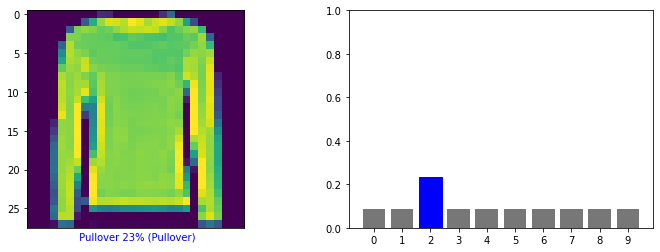

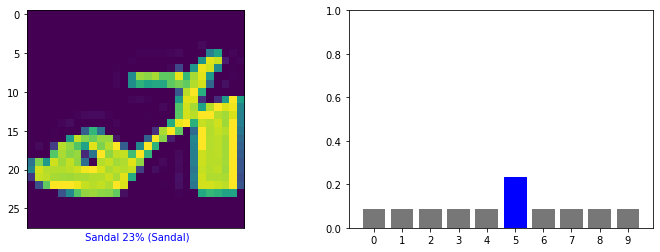

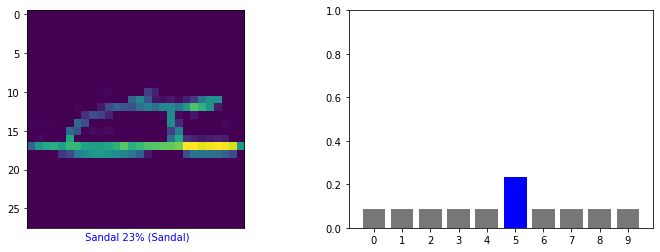

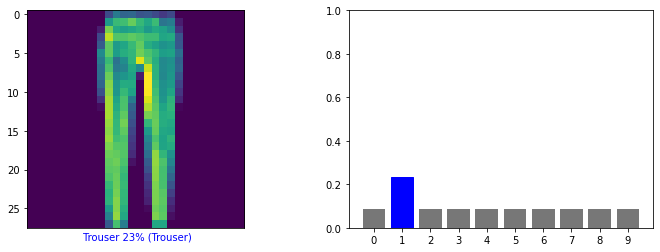

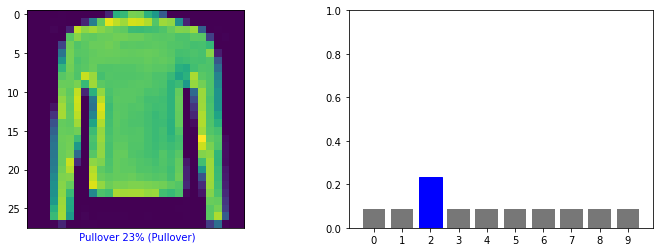

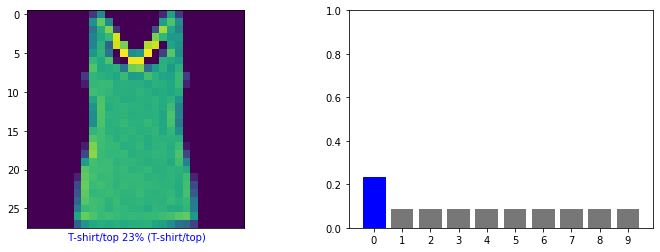

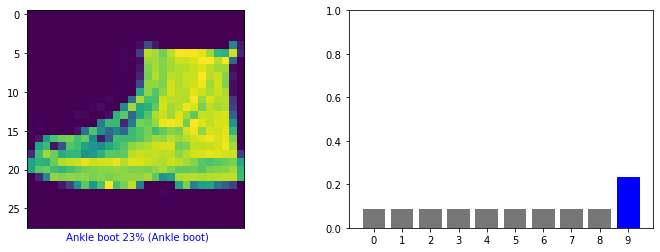

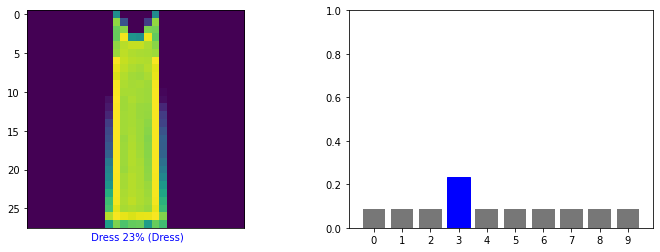

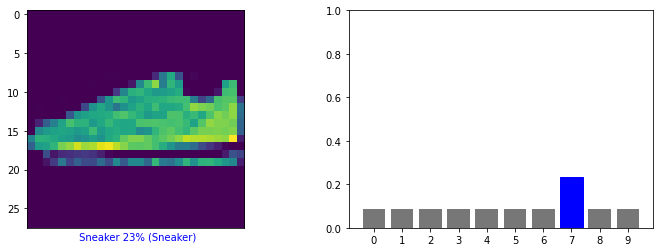

In [47]:
i = 0
for i in range(900,920):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i],  test_labels)